In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression,RidgeClassifier,Lasso,ElasticNet
import sklearn.metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold,KFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc=StandardScaler()

In [44]:
df = pd.read_csv("Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df.shape

(891, 12)

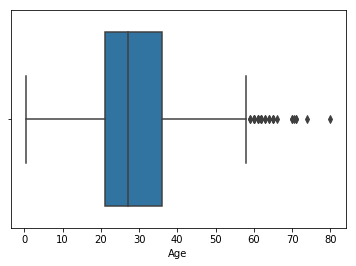

In [92]:
sns.boxplot(x='Age',data=df)

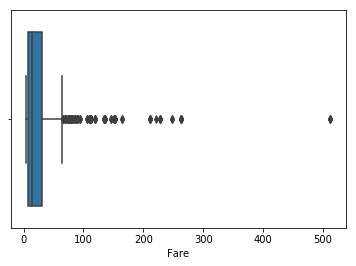

In [93]:
sns.boxplot(x='Fare',data=df)

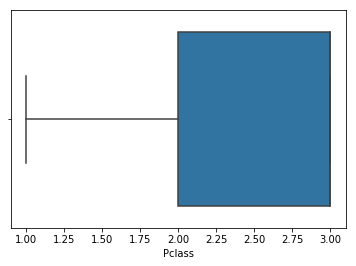

In [22]:
sns.boxplot(x='Pclass',data=df)

In [55]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [54]:
df['Age']=df.groupby(['Pclass','Sex','Embarked'])['Age'].transform(lambda x:x.fillna(x.median()))

In [36]:
df[df.Age>=60]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C


In [51]:
df[df['Embarked'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [50]:
 df['Embarked']=df.groupby(['Pclass','Sex'])['Embarked'].transform(lambda x: x.fillna(x.mode()[0]))

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
df[df['Age']>60]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


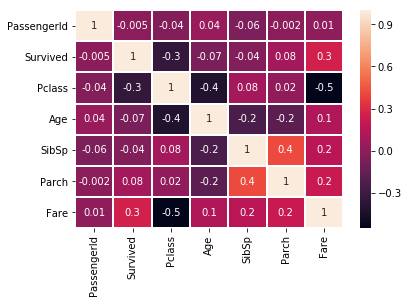

In [59]:
sns.heatmap(df.corr(),linewidth=1,annot=True,fmt='0.1g')

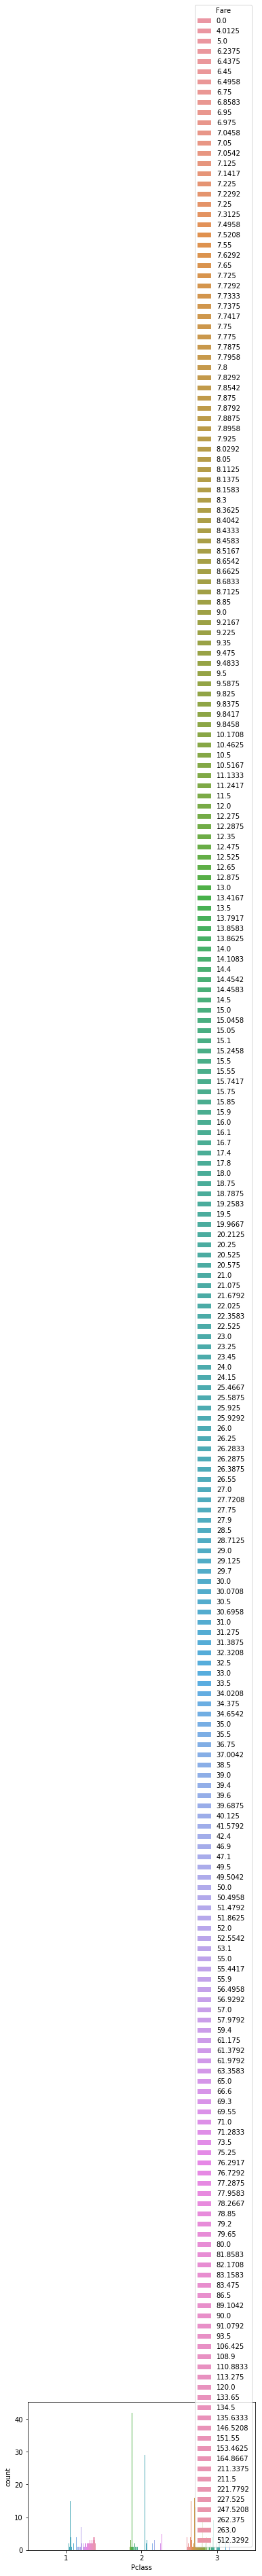

In [60]:
sns.countplot(x='Pclass',hue='Fare',data=df)

In [91]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.132346,0.523008,0.381594,32.605129
std,257.353842,0.486592,0.836071,13.365516,1.102743,0.806057,49.584409
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,4.012500
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,446.000000,0.000000,3.000000,27.000000,0.000000,0.000000,14.500000
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [90]:
df[df['Fare'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [84]:
df.loc[df["Fare"]==0,"Fare"]=np.nan

In [95]:
df[df['Fare']>150]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,NaN,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,C125,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.00,0,1,PC 17558,247.5208,B58 B60,C
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.00,0,2,36928,164.8667,C7,S


In [64]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [72]:
df1=df.groupby(['Embarked','Survived']).groups

In [74]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.132346,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.365516,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [88]:
df.groupby(['Pclass','Sex'])['Fare'].agg('median')

Pclass  Sex   
1       female    82.66455
        male      49.50420
2       female    22.00000
        male      13.00000
3       female    12.47500
        male       7.92500
Name: Fare, dtype: float64

In [89]:
 df['Fare']=df.groupby(['Pclass','Sex'])['Fare'].transform(lambda x: x.fillna(x.median()))

In [98]:

catagorical_columns=df.select_dtypes(include='object')

In [99]:
numerical_columns=df.select_dtypes(exclude='object')


In [100]:
catagorical_columns.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [106]:
numerical_columns.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [102]:
encode=pd.get_dummies(catagorical_columns.drop(columns=["Name","Cabin","Ticket"]))

In [104]:
processing_final=pd.concat([encode,numerical_columns.drop(columns=["PassengerId"])],axis=1)

In [105]:
processing_final.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,0,1,0,3,22.0,1,0,7.2500
1,1,0,1,0,0,1,1,38.0,1,0,71.2833
2,1,0,0,0,1,1,3,26.0,0,0,7.9250
3,1,0,0,0,1,1,1,35.0,1,0,53.1000
4,0,1,0,0,1,0,3,35.0,0,0,8.0500


In [107]:
from sklearn.model_selection import train_test_split

test_size=0.3 # Test-set fraction

In [108]:
X = processing_final.drop('Survived',axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [109]:
X.shape

(891, 10)

In [110]:
y.shape

(891,)

In [111]:
from sklearn.naive_bayes import GaussianNB

In [112]:
nbc = GaussianNB()

In [113]:
nbc.fit(X_train,y_train)

GaussianNB(priors=None)

In [114]:
y_pred = nbc.predict(X_test)
mislabel = np.sum((y_test!=y_pred))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 268 test samples is 56


In [115]:
from sklearn.metrics import classification_report

In [116]:
print("The classification report is as follows...\n")
print(classification_report(y_pred,y_test))

The classification report is as follows...

             precision    recall  f1-score   support

          0       0.87      0.79      0.83       170
          1       0.69      0.79      0.73        98

avg / total       0.80      0.79      0.79       268



In [117]:
from sklearn.metrics import confusion_matrix

In [120]:
cm = (confusion_matrix(y_test,y_pred))
cmdf = pd.DataFrame(cm,index=['Survived1','Survived2'], columns=['Survived1','Survived2'])
print("The confusion matrix looks like following...\n")
cmdf

The confusion matrix looks like following...



,Survived1,Survived2
Survived1,135,21
Survived2,35,77


In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [122]:
train_Pred = logreg.predict(X_train)

In [123]:
metrics.confusion_matrix(y_train,train_Pred)

array([[345,  48],
       [ 68, 162]], dtype=int64)

In [124]:
metrics.accuracy_score(y_train,train_Pred)

0.8138041733547352

In [125]:
test_Pred = logreg.predict(X_test)

In [126]:
metrics.confusion_matrix(y_test,test_Pred)

array([[140,  16],
       [ 38,  74]], dtype=int64)

In [127]:
metrics.accuracy_score(y_test,test_Pred)

0.7985074626865671

In [128]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_Pred))

             precision    recall  f1-score   support

          0       0.79      0.90      0.84       156
          1       0.82      0.66      0.73       112

avg / total       0.80      0.80      0.79       268



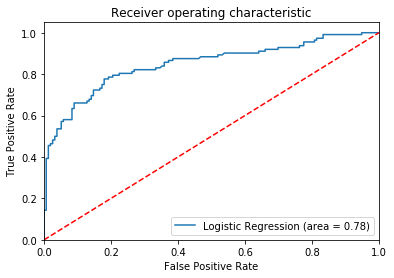

In [129]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [130]:
p_lr=Pipeline([('sc',sc),('lr',LogisticRegression())])
p_lr1=Pipeline([('sc1',sc),('lr1',LogisticRegression(penalty='l1'))])
p_rd=Pipeline([('sc',sc),('rd',RidgeClassifier())])
p_las=Pipeline([('sc',sc),('ls',Lasso())])
p_elas=Pipeline([('sc',sc),('els',ElasticNet())])

In [131]:
grid_lr={'lr__class_weight':['balanced',None]}
grid_lr1={'lr1__class_weight':['balanced',None]}
grid_rd={'rd__normalize':[True,False]}
grid_ls = {'ls__alpha':np.arange(0.5,1.1,0.1)}
grid_els={'els__alpha':np.arange(0.5,1.1,0.1),'els__l1_ratio':np.arange(0,0.6,0.1)}

In [133]:
cv =StratifiedKFold(n_splits=10).get_n_splits(X,y)
#cv=KFold(n_splits=10).get_n_splits(x,y)

In [134]:
lr =GridSearchCV(p_lr,grid_lr,'accuracy',cv=cv)
lr1 =GridSearchCV(p_lr1,grid_lr1,'accuracy',cv=cv)
rd=GridSearchCV(p_rd,grid_rd,scoring='accuracy',cv=cv)
ls=GridSearchCV(p_las,grid_ls,scoring='accuracy',cv=cv)
els=GridSearchCV(p_elas,grid_els,scoring='accuracy',cv=cv)
model=[lr,rd,lr1]
modelname=['LR','Rid','Lass']

In [136]:
ypred=pd.DataFrame()
for j,i in enumerate(model):
    i.fit(X,y)
    ypred[modelname[j]]=i.predict(test)
    print(i.best_params_)
    print(i.best_score_)

NameError: name 'test' is not defined